# 尼日利亚观众音乐品味的聚类分析

In [2]:
# 数据分析常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 去除警告
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv('nigerian-songs.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [3]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

歌曲名称、专辑、艺术家、艺术家顶级流派、发行日期、长度、流行度、舞蹈性、音乐性、能量、乐器性、活跃度、响度、语速、节奏和时值  
**各列都是530，均不存在空值，故无需进行缺失值处理。数据类型见Dtype。通过观察，这是一个比较规整的数据集，无需进行缺失值等处理。**


In [4]:
# 替换列名称，便于理解
# 原始列名: ['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']
data.columns = ['歌曲名称', '专辑', '歌手', '歌手主要流派', '发行日期', '时长', '流行度', '舞蹈性', '声学性', '能量值', '器乐性', '现场感', '响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']
# 查看数据的前5行
data

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [5]:
# 统计每列的非重复值数量
data.nunique()

歌曲名称         497
专辑           428
歌手           171
歌手主要流派        19
发行日期          20
时长           518
流行度           66
舞蹈性          304
声学性          406
能量值          329
器乐性          294
现场感          362
响度(dB)       504
语音性/说唱成分     386
节拍速度(BPM)    514
拍号             3
dtype: int64

##### 年度歌曲发布变化

<Axes: title={'center': '年度发行歌曲数量变化'}, xlabel='发行日期'>

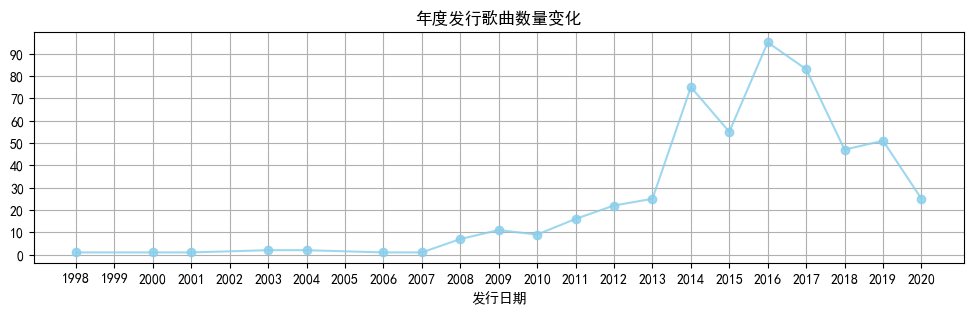

In [6]:
data['发行日期'].value_counts().sort_index().plot(kind='line', figsize=(12, 3), color='skyblue',title='年度发行歌曲数量变化',xticks=range(min(data['发行日期']), max(data['发行日期']) + 1, 1),yticks=range(0, 100, 10),marker='o',grid=True,alpha=0.8  )
# print(data['发行日期'].value_counts().sort_index())

**发展特征：2008年后快速增长，从个位数跃升到两位数。2016年达到峰值（95首），是音乐创作最活跃的一年可能与数字音乐平台兴起相关。2014-2017年是黄金时期，308首约占占总量的58% 。此后逐渐下降。整体呈现先增长后近代逐渐下降的发展模式。**


<Axes: title={'center': '歌曲歌手主要流派出现频次分布'}, xlabel='歌手主要流派'>

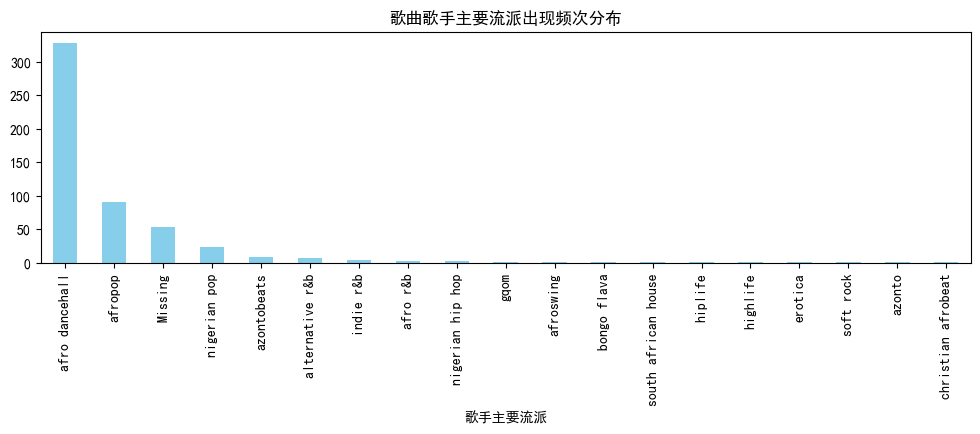

In [7]:
data['歌手主要流派'].value_counts().plot(kind='bar', figsize=(12, 3), color='skyblue',title='歌曲歌手主要流派出现频次分布')
# print(data['歌手主要流派'].value_counts())

**从上述可见对于尼日利亚歌曲数据集的中存在19个流派，且歌手主要流派偏好以afro dancehall流派最为绝对的头部流派占据328/497，其次的afropop 、Missing 、nigerian pop为中流派系整体（十位数量级），其他流派系占比较少，基本歌手数量低于10，属于小众流派。**

In [8]:
# data['歌手'].value_counts().head(15).plot(kind='bar',figsize=(12, 3),color='skyblue',title='歌手出现频次分布')

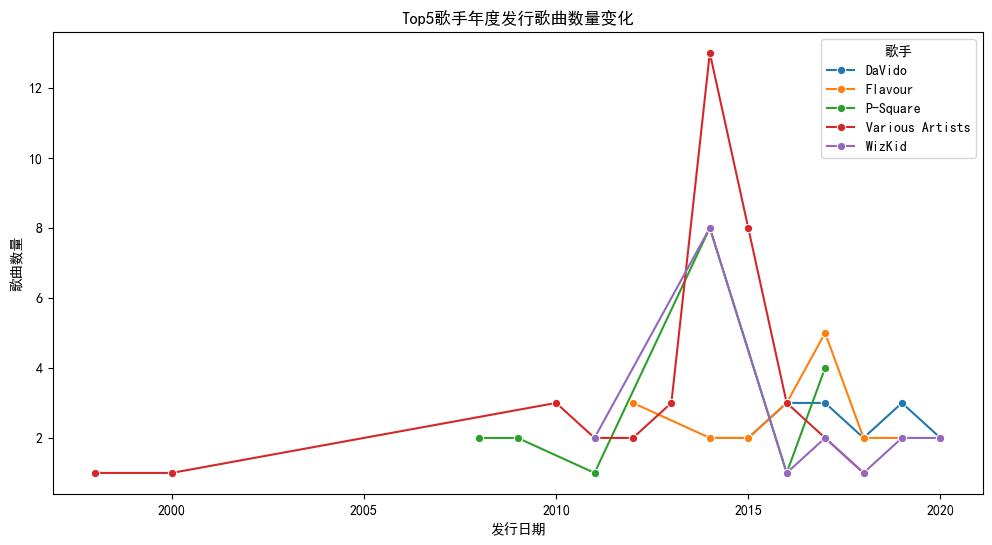

In [25]:
# top5的歌手的年度发行歌曲数量变化
gs_gq_y = data.groupby(['歌手', '发行日期']).size().reset_index(name='歌曲数量')
top_gesho = gs_gq_y[gs_gq_y['歌手'].isin(data['歌手'].value_counts().head(5).index)]
# 绘制图表-top5歌手年度发行歌曲数量变化
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_gesho, x='发行日期', y='歌曲数量', hue='歌手', marker='o')
plt.title('Top5歌手年度发行歌曲数量变化')
plt.xlabel('发行日期')
plt.ylabel('歌曲数量')
# plt.xticks(rotation=45)
# plt.grid(True)
plt.show()
# print(top_gesho)

*从图中可以看到发哥数前五的歌手中，可能存在不同的情况：长青类如Various Artists-能长期持续的输出歌曲，重点新星如WizKid-短期出现发布大量歌曲，稳定型歌手如Flavour-不论市场情况如何均稳定输出。*    
**后续可以继续对歌手进行分类，通过如，热度情况、发歌量、首歌年份、存续年份、等对歌手划分不同类别，帮助筛选当下有发展前景的歌手群体**

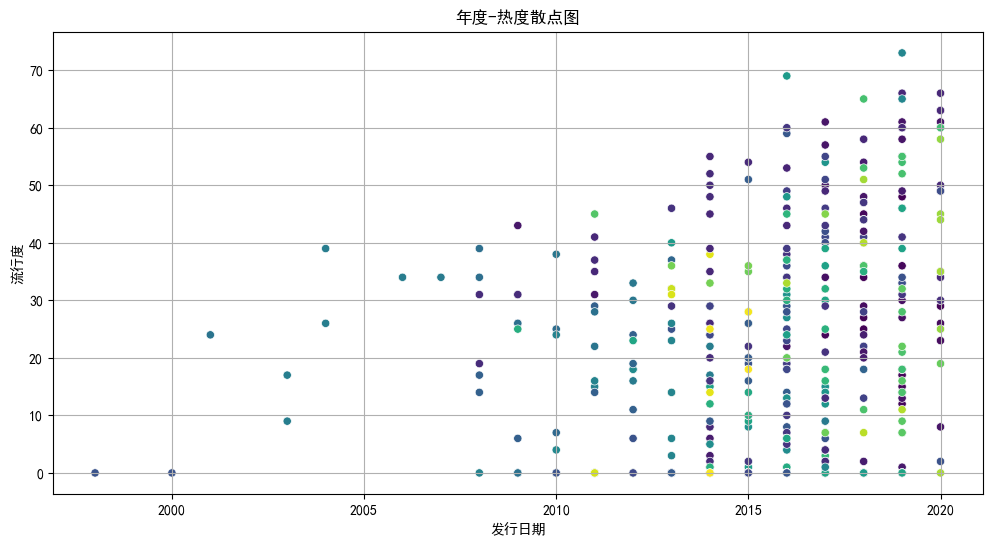

In [27]:
# 绘制年度-热度散点图
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='发行日期', y='流行度', hue='歌手', palette='viridis', legend=False)
plt.title('年度-热度散点图')
plt.xlabel('发行日期')
plt.ylabel('流行度')
plt.grid(True)
plt.show()

1. 从图中可见随时间变化，歌曲整体热度上限和总量在不断持续提升，表明行业态势持续向好发展  
2. 猜测歌曲发行越早累计热度越高，但实际表明，这种关系并不明显，且反而是进今年的发行的歌曲热度较高，高热度且发行早的歌曲极少。
3. 2现象存在的原因可能是因为相关音乐平台兴起、大众接受度的提升、产业的成熟等，导致整体的提升

In [30]:
# top5流量热度的歌手
gs_ll_data = data.groupby(['歌手'])['流行度'].sum().reset_index()
gs_ll_data.sort_values(by='流行度', ascending=False).head(5)

,歌手,流行度
159,WizKid,731
31,DaVido,560
142,Tekno,417
105,P-Square,390
99,Odunsi (The Engine),252


In [12]:
data.describe()#查看数据的基本统计信息

,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


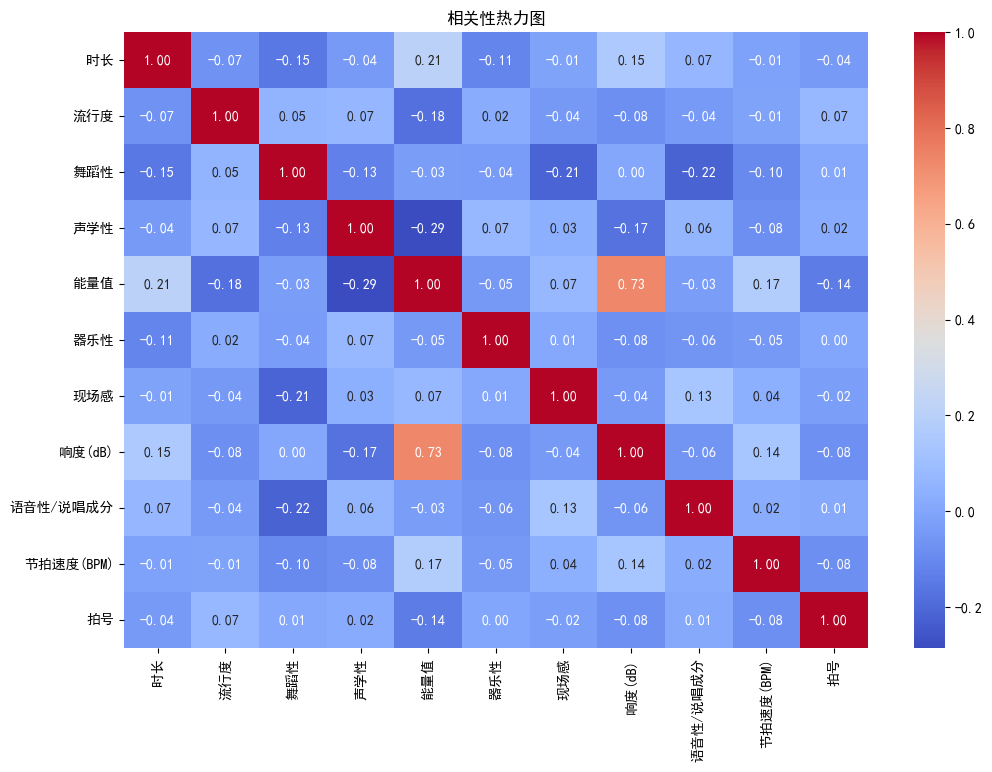

In [13]:
# 相关性热力图
data1= data.drop(['歌曲名称', '专辑', '歌手', '歌手主要流派', '发行日期'], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(data1.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f') #method='pearson'表示使用皮尔逊相关系数-皮尔逊相关系数是最常用的相关系数之一，适用于线性关系的度量
plt.title('相关性热力图')
plt.show()

从热力图可见线性相关性最高响度(dB)与能量值为0.73，表明两者具有强的正相关性，往往**响度(dB)高的歌曲表现出的能量值也较高**。  


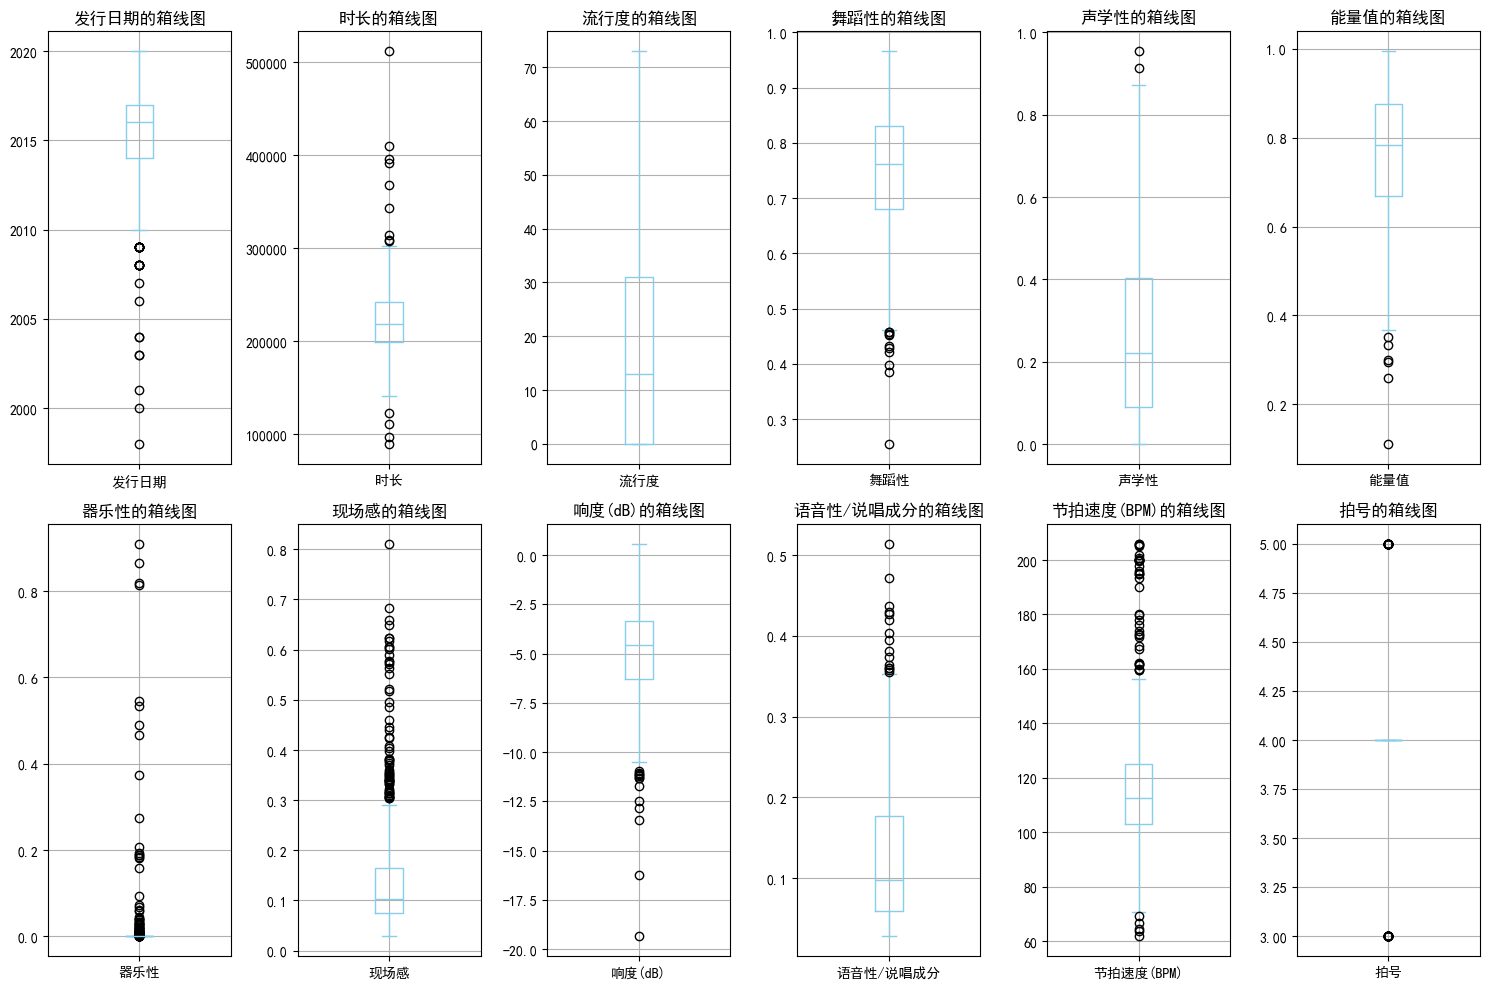

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 获取数值型列
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']

# 计算子图布局
n_cols = len(numeric_columns)
if n_cols == 0:
    print("没有数值型列可以绘制箱线图")
else:
    # 计算行数和列数
    n_rows = int(np.ceil(n_cols / 6))  # 每行3个图
    n_subplot_cols = min(n_cols, 6)
    
    # 创建图组
    fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(15, 5*n_rows))
    
    # 如果只有一行，确保axes是二维数组
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # 绘制箱线图
    for idx, col in enumerate(numeric_columns):
        row = idx // n_subplot_cols
        col_idx = idx % n_subplot_cols
        
        data[col].plot(kind='box', ax=axes[row, col_idx], 
                      color='skyblue', title=f'{col}的箱线图', grid=True)
    
    # 隐藏多余的子图
    for idx in range(n_cols, n_rows * n_subplot_cols):
        row = idx // n_subplot_cols
        col_idx = idx % n_subplot_cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

